In [1]:
import re
import numpy as np
import pandas as pd
import jieba
import openpyxl
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
jieba.dt.cache_file = 'jieba.cache.lmspeech'

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.016 seconds.
Prefix dict has been built successfully.


美國 178
牛肉 106
瘦肉精 100
進口 98
臺灣 73
美牛 57
國人 47
報告 43
國家 40
意見 39


  Terms  Freq.
0    美國    178
1    牛肉    106
2   瘦肉精    100
3    進口     98
4    臺灣     73
5    美牛     57
6    國人     47
7    報告     43
8    國家     40
9    意見     39
Text(0, 0.5, 'Frequency')


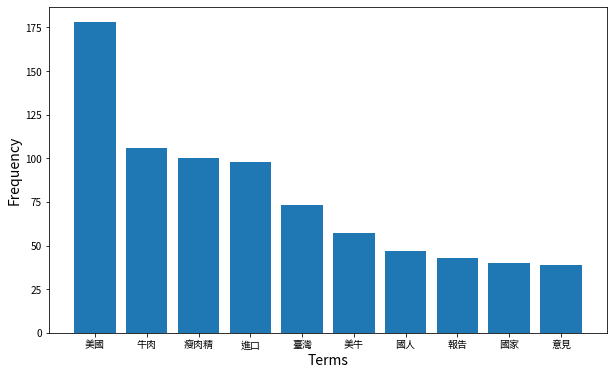

In [2]:
data01 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/prousspeech_ma.xlsx")
data01.fillna("",inplace=True)
lmspeech_pro = list(data01['text'])
data01.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_pro = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_pro]
for idx, speech in enumerate(lmspeech_pro):
    lmspeech_pro[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_pro)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_pro)
    bag_of_words = vec.transform(lmspeech_pro)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_maprous = get_top_n_words(lmspeech_pro, 10)
for word, freq in common_words_maprous:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ma_prous_plotly = pd.DataFrame(common_words_maprous, columns = ['ReviewText' , 'count'])
ma_prous_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of pro-U.S. legislators in Ma era')

maprous_cwdf = pd.DataFrame(common_words_maprous, columns=['Terms', 'Freq.'])  
print(maprous_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

prous_ma_fig = plt.figure(figsize=(10,6))
prous_ma_fig = plt.bar(maprous_cwdf['Terms'], maprous_cwdf['Freq.']) 
prous_ma_fig = plt.xlabel('Terms', fontsize = 14)
prous_ma_fig = plt.ylabel("Frequency", fontsize = 14)
#proim_ma_fig = plt.title("The 10 most frequent terms of pro-U.S. legislators in Ma era", fontsize = 18)

print(prous_ma_fig)

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.002 seconds.
Prefix dict has been built successfully.


美國 609
牛肉 292
進口 276
瘦肉精 206
談判 164
臺灣 146
報告 137
健康 107
衛生署 106
政府 101


  Terms  Freq.
0    美國    609
1    牛肉    292
2    進口    276
3   瘦肉精    206
4    談判    164
5    臺灣    146
6    報告    137
7    健康    107
8   衛生署    106
9    政府    101
Text(0, 0.5, 'Frequency')


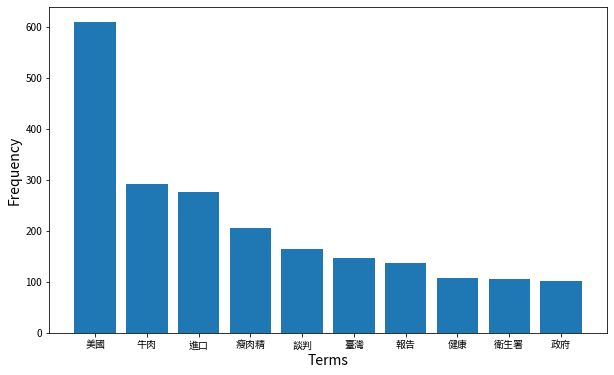

In [3]:
data02 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/antiusspeech_ma.xlsx")
data02.fillna("",inplace=True)
lmspeech_anti = list(data02['text'])
data02.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_anti = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_anti]
for idx, speech in enumerate(lmspeech_anti):
    lmspeech_anti[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_anti)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_anti)
    bag_of_words = vec.transform(lmspeech_anti)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_maantius = get_top_n_words(lmspeech_anti, 10)
for word, freq in common_words_maantius:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ma_antius_plotly = pd.DataFrame(common_words_maantius, columns = ['ReviewText' , 'count'])
ma_antius_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of U.S.-skeptism legislators in Ma era')

maantius_cwdf = pd.DataFrame(common_words_maantius, columns=['Terms', 'Freq.'])  
print(maantius_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

antius_ma_fig = plt.figure(figsize=(10,6))
antius_ma_fig = plt.bar(maantius_cwdf['Terms'], maantius_cwdf['Freq.'])
antius_ma_fig = plt.xlabel('Terms', fontsize = 14)
antius_ma_fig = plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of U.S.-skeptism legislators in Ma era", fontsize = 18)

print(antius_ma_fig)

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.000 seconds.
Prefix dict has been built successfully.


美國 664
瘦肉精 480
牛肉 470
進口 466
行政院 288
國人 235
衛生署 233
食品 227
健康 215
臺灣 212


  Terms  Freq.
0    美國    664
1   瘦肉精    480
2    牛肉    470
3    進口    466
4   行政院    288
5    國人    235
6   衛生署    233
7    食品    227
8    健康    215
9    臺灣    212
Text(0, 0.5, 'Frequency')


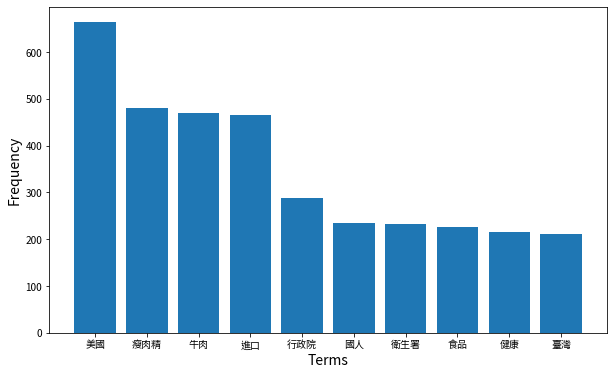

In [4]:
data03 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/dmusspeech_ma.xlsx")
data03.fillna("",inplace=True)
lmspeech_dm = list(data03['text'])
data03.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_dm = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_dm]
for idx, speech in enumerate(lmspeech_dm):
    lmspeech_dm[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_dm)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_dm)
    bag_of_words = vec.transform(lmspeech_dm)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_madmus = get_top_n_words(lmspeech_dm, 10)
for word, freq in common_words_madmus:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ma_dmus_plotly = pd.DataFrame(common_words_madmus, columns = ['ReviewText' , 'count'])
ma_dmus_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', 
    title='The 10 most frequent terms of unknown stance legislators in Ma era')

madmus_cwdf = pd.DataFrame(common_words_madmus, columns=['Terms', 'Freq.'])  
print(madmus_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

dmus_ma_fig = plt.figure(figsize=(10,6))
dmus_ma_fig = plt.bar(madmus_cwdf['Terms'], madmus_cwdf['Freq.'])
dmus_ma_fig = plt.xlabel('Terms', fontsize = 14)
dmus_ma_fig = plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of unknown stance legislators in Ma era", fontsize = 18)

print(dmus_ma_fig)

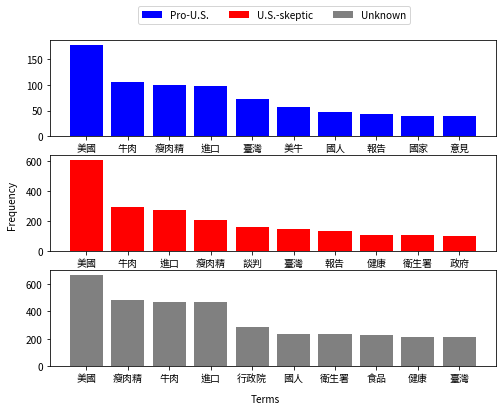

In [5]:
#Merging three figures into one
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(8,6))
plt.subplot(3, 1, 1)
prous_ma_fig = plt.bar(maprous_cwdf['Terms'], maprous_cwdf['Freq.'], color = 'blue')
plt.subplot(3, 1, 2)
antius_ma_fig = plt.bar(maantius_cwdf['Terms'], maantius_cwdf['Freq.'], color = 'red')
plt.subplot(3, 1, 3)
dmus_ma_fig = plt.bar(madmus_cwdf['Terms'], madmus_cwdf['Freq.'], color = 'grey')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, 'Terms', ha='center', va='center', fontsize = 10)
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontsize = 10)
fig.legend(handles=[prous_ma_fig, antius_ma_fig, dmus_ma_fig], labels=['Pro-U.S.', 'U.S.-skeptic', 'Unknown'],
           bbox_to_anchor=[0.76, 0.97], ncol=3)
plt.savefig('uswordfreq_ma.png', dpi=300)

In [6]:
#Font check
from matplotlib import font_manager
font_set = {f.name for f in font_manager.fontManager.ttflist}
for f in font_set:
    print(f)

Ink Free
Microsoft JhengHei
Courier New
MS Reference Specialty
RM Pro
Segoe Fluent Icons
cmb10
Segoe Print
Bradley Hand ITC
Pristina
Tw Cen MT
Franklin Gothic Medium Cond
STIXNonUnicode
Playbill
STIXGeneral
Old English Text MT
Kunstler Script
Franklin Gothic Book
Juice ITC
Javanese Text
Segoe MDL2 Assets
Microsoft PhagsPa
Bookshelf Symbol 7
Rockwell Extra Bold
Copperplate Gothic Light
Franklin Gothic Medium
Sitka
Marlett
Dosis
Corbel
Cormorant Infant
Gadugi
Gill Sans MT Ext Condensed Bold
Noto Sans Mono CJK TC
French Script MT
cmtt10
Imprint MT Shadow
MingLiU-ExtB
MT Extra
Leelawadee
Bodoni MT
Colonna MT
Freestyle Script
Microsoft YaHei
Maiandra GD
Arial Rounded MT Bold
Noto Serif
Segoe UI Emoji
Engravers MT
MS Reference Sans Serif
Poor Richard
Kristen ITC
Montserrat
Raleway
Curlz MT
Britannic Bold
DejaVu Serif Display
DejaVu Sans
Webdings
Microsoft Uighur
Yu Gothic
Perpetua Titling MT
MingLiU
Eras Demi ITC
Arial
Tw Cen MT Condensed
Noto Sans CJK TC
Segoe Script
Lucida Sans Unicode
Sim